# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 874 kB/s eta 0:00:01██▍                   | 14.4 MB 874 kB/s eta 0:00:27
     |████████████████████████████████| 19.3 MB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.5 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 59.3 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 72.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 79.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 66.0 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.1 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=628a2c4c96a3dc80471553d1c0563dc0dab19d6859c042a8cc3f92c29b5e12c9
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

In [2]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor()])

validation_split = 0.16

# Create training set and define training dataloader
dataset = torchvision.datasets.MNIST(root="data", train=True, transform=transform, download=True)

total_length = len(dataset)
validation_length = int(total_length * validation_split)
training_length = total_length - validation_length

# Spliting the dataset into training and validation sets
train_data, val_data = torch.utils.data.random_split(dataset, [training_length, validation_length])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(val_data, batch_size=32)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The transform ToTensor() scales the pixel values to a range of 0 to 1. It normalizes the pixel values.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


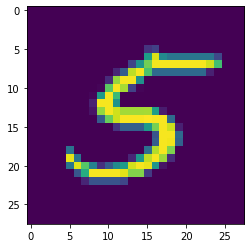

7


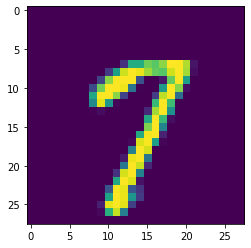

9


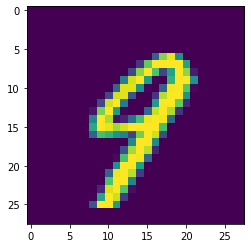

2


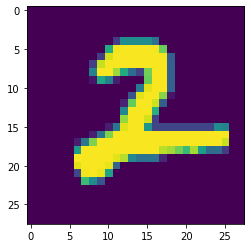

4


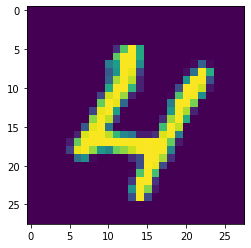

In [18]:
# Explore data

show5(train_loader)

In [24]:
print("Size of the train dataset is: ", len(train_loader.dataset))
print("Shape of train input datapoint is: ", train_loader.dataset[0][0].shape)
print("======================================================")
print("Size of the test dataset is: ", len(test_loader.dataset))
print("Shape of test nput datapoint is: ",test_loader.dataset[0][0].shape)
print("======================================================")
print("Size of the validation dataset is: ", len(validation_loader.dataset))
print("Shape of validation input datapoint is: ",validation_loader.dataset[0][0].shape)

Size of the train dataset is:  50400
Shape of train input datapoint is:  torch.Size([1, 28, 28])
Size of the test dataset is:  10000
Shape of test nput datapoint is:  torch.Size([1, 28, 28])
Size of the validation dataset is:  9600
Shape of validation input datapoint is:  torch.Size([1, 28, 28])


#### Below I'll be checking the shape of the input as it goes through the convolutional layer which will make it easy to handle flatenning.

In [25]:
conv1 = nn.Conv2d(1, 6, 3)
pool = nn.MaxPool2d(2, 2)
out1 = conv1(train_loader.dataset[0][0])
out1 = F.relu(out1)
print("Shape before poolng", out1.shape)
print("Shape after pooling", pool(out1).shape)

Shape before poolng torch.Size([6, 26, 26])
Shape after pooling torch.Size([6, 13, 13])


In [27]:
conv2 = nn.Conv2d(6, 16, 3)
out2 = F.relu(conv2(pool(out1)))
print("Shape before poolng", out2.shape)
print("Shape after pooling", pool(out2).shape)

Shape before poolng torch.Size([16, 11, 11])
Shape after pooling torch.Size([16, 5, 5])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3)
        # Define fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 1024)
        self.fc2 = nn.Linear(1024, 512) 
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 84)
        self.fc5 = nn.Linear(84, 10)  

    def forward(self, x):
        # Applying convolutions and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the data for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [38]:
net = ConvNet()
if torch.cuda.is_available():
    net.cuda()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [39]:
# Choose an optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [4]:
def train(net, train_loader, validation_loader, optimizer, criterion, epochs):
    train_loss_hist = []
    val_loss_hist = []

    for epoch in range(num_epochs):
        net.train()
        train_loss = 0
        train_correct = 0
        for i, (inputs, labels) in enumerate(train_loader):

            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            # Zero out the gradients of the optimizer
            optimizer.zero_grad()

            # Get the outputs of model
            outputs = net(inputs)
            # Compute loss
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()


            # Compute the accuracy and print out accuracy and loss
            _, preds = torch.max(outputs.data, 1)
            train_correct += (preds == labels).float().mean().item()
            train_loss += loss.item()
        print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.3f}% training loss: {train_loss/len(train_loader):.5f}')
        train_loss_hist.append(train_loss/len(train_loader))

        # The validation step is done for you.
        val_loss = 0.0
        val_correct = 0
        net.eval()
        for inputs, labels in validation_loader:
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).float().mean().item()
            val_loss += loss.item()
        print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(validation_loader):.3f}% validation loss: {val_loss/len(validation_loader):.5f}')
        val_loss_hist.append(val_loss/len(validation_loader))
        
    return (train_loss_hist, val_loss_hist)

In [41]:
num_epochs = 10
train_loss_hist, val_loss_hist = train(
                                        net,
                                        train_loader,
                                        validation_loader,
                                        optimizer,
                                        criterion,
                                        num_epochs
                                    )

Epoch 1 training accuracy: 0.124% training loss: 2.29496
Epoch 1 validation accuracy: 0.198% validation loss: 2.27169
Epoch 2 training accuracy: 0.643% training loss: 1.13245
Epoch 2 validation accuracy: 0.876% validation loss: 0.39266
Epoch 3 training accuracy: 0.908% training loss: 0.28759
Epoch 3 validation accuracy: 0.935% validation loss: 0.21159
Epoch 4 training accuracy: 0.947% training loss: 0.17129
Epoch 4 validation accuracy: 0.958% validation loss: 0.13437
Epoch 5 training accuracy: 0.960% training loss: 0.12472
Epoch 5 validation accuracy: 0.967% validation loss: 0.10586
Epoch 6 training accuracy: 0.969% training loss: 0.09950
Epoch 6 validation accuracy: 0.969% validation loss: 0.09672
Epoch 7 training accuracy: 0.974% training loss: 0.08359
Epoch 7 validation accuracy: 0.970% validation loss: 0.09458
Epoch 8 training accuracy: 0.977% training loss: 0.07238
Epoch 8 validation accuracy: 0.975% validation loss: 0.07696
Epoch 9 training accuracy: 0.979% training loss: 0.06288

Plot the training loss (and validation loss/accuracy, if recorded).

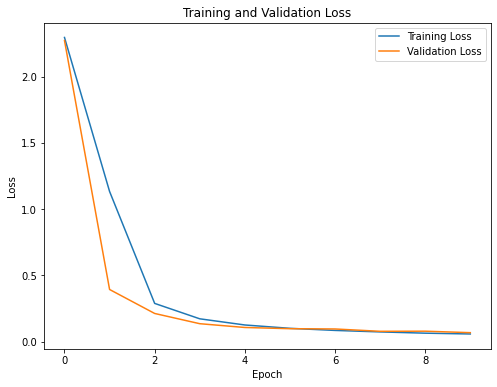

In [42]:
plt.figure(figsize=(8, 6))

# Ploting training loss
plt.plot(train_loss_hist, label='Training Loss')

# Ploting validation loss
plt.plot(val_loss_hist, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [44]:
def test(model, test_loader):
  model.eval()
  
  true = 0
  # Initializing total number of test samples
  total = 0

  with torch.no_grad():
    for data, target in test_loader:
        
      if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()

      output = model(data)
      # Get the index of the predicted class with the highest probability
      predicted = torch.argmax(output, dim=1)
      # Update correct predictions count
      true += (predicted == target).sum().item()
      # Update total number of samples
      total += target.size(0)

  # Calculate and print accuracy
  accuracy = 100 * true / total
  print(f'Test Accuracy is: {accuracy:.2f}%')

test(net, test_loader)

Test Accuracy: 98.23%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [46]:
net2 = ConvNet()
if torch.cuda.is_available():
    net2.cuda()
optimizer2 = optim.Adam(net2.parameters(), lr=0.001)
criterion2 = nn.CrossEntropyLoss()
epochs = 15

train_loss_hist2, val_loss_hist2 = train(net2, train_loader, validation_loader, optimizer2, criterion2, epochs)

Epoch 1 training accuracy: 0.779% training loss: 0.65566
Epoch 1 validation accuracy: 0.893% validation loss: 0.36772
Epoch 2 training accuracy: 0.945% training loss: 0.17802
Epoch 2 validation accuracy: 0.919% validation loss: 0.26454
Epoch 3 training accuracy: 0.962% training loss: 0.12072
Epoch 3 validation accuracy: 0.934% validation loss: 0.23676
Epoch 4 training accuracy: 0.975% training loss: 0.08004
Epoch 4 validation accuracy: 0.933% validation loss: 0.25532
Epoch 5 training accuracy: 0.982% training loss: 0.05871
Epoch 5 validation accuracy: 0.944% validation loss: 0.22480
Epoch 6 training accuracy: 0.986% training loss: 0.04237
Epoch 6 validation accuracy: 0.955% validation loss: 0.18185
Epoch 7 training accuracy: 0.985% training loss: 0.05210
Epoch 7 validation accuracy: 0.954% validation loss: 0.18580
Epoch 8 training accuracy: 0.992% training loss: 0.02801
Epoch 8 validation accuracy: 0.974% validation loss: 0.12315
Epoch 9 training accuracy: 0.992% training loss: 0.02416

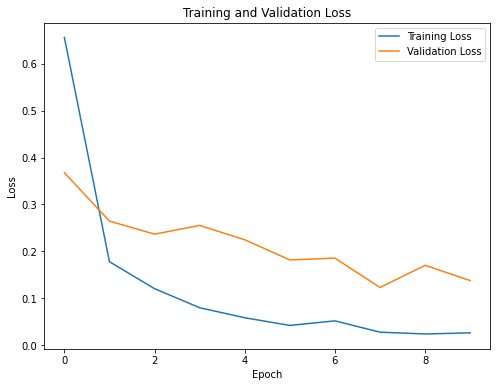

In [47]:
plt.figure(figsize=(8, 6))

# Ploting training loss
plt.plot(train_loss_hist2, label='Training Loss')

# Ploting validation loss
plt.plot(val_loss_hist2, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [48]:
test(net2, test_loader)

Test Accuracy: 99.58%


## Saving your model
Using `torch.save`, save your model for future loading.

In [49]:
# Saving the fist model
checkpoint = {
    "state_dict": net.state_dict(),
    "optimizer_state_dict": net.state_dict(),
}

torch.save(checkpoint, "net1_checkpoint.pth")

In [50]:
# Saving the second model
checkpoint = {
    "state_dict": net2.state_dict(),
    "optimizer_state_dict": net2.state_dict(),
}

torch.save(checkpoint, "net2_checkpoint.pth")